# Which is the best cell phone plan?

The telecommunications company Megaline offers its customers Surf and Ultimate prepaid cell phone plans.


The commercial department wants to know which of the plans give the most revenue in order to adjust the advertising budget.


We will perform a first analysis of the plans based on a small selection of customers.

We will have data from 500 Megaline customers, among the variables: which customers they are, where they are from, which plan they use, the number of calls they made and messages they sent in 2018.

**Our job is to analyze customer behavior and determine which prepaid plans bring in the most revenue.**

# Starting

Given our intention to analyze customer behavior and determine which plans generate the most revenue, we imagine that we will probably use a lot of libraries.

Let's leave them loaded, just in case:

In [164]:
# Loading all libraries

import pandas as pd # pandas: for manipulation and analysis of tabular data

from scipy import stats as st # scipy.stats: for statistical calculations and hypothesis testing

import numpy as np # numpy: for numeric calculations and array operations

from matplotlib import pyplot as plt # matplotlib.pyplot: for visualizing data in graphs and plots

from math import factorial # math.factorial: for calculating factorials, useful in binomial distributions

from scipy.stats import norm # scipy.stats.norm: for normal distribution and related calculations

import random # random: for random number generation

from scipy.stats import binom, norm # scipy.stats.binom: for binomial distribution and related calculations.

# Loading data

We have access to datasets coming from five different files.

Let's load them to later use them to reach our goal:

In [165]:
# Loading data files into different DataFrames

df_users = pd.read_csv('/datasets/megaline_users.csv')
    
df_plans = pd.read_csv('/datasets/megaline_plans.csv')

df_calls = pd.read_csv('/datasets/megaline_calls.csv')

df_messages = pd.read_csv('/datasets/megaline_messages.csv')

df_internet = pd.read_csv('/datasets/megaline_internet.csv')

# Preparing the data

Since the data is split across multiple tables, we'll explore each one to get an initial understanding of the data and make the necessary corrections to each table if necessary.

## Plans

In [166]:
# Printing the general/summary information about the plans DataFrame

df_plans.info()

df_plans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [167]:
# Printing sample data for plans

df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


✅ no nan values

✅ column names

✅ data types

In this first table above we can see a general description of the communication plans.

Column names, data types, and missing values don't seem to have any issues.

Maybe we can think of some more later, but right now, we plan to add six columns that represent the amount of messages, data (mb) and minutes per dollar (usd), for both the included and the extra plan.

### Correcting the data

Apparently, in this first table, we might consider changing only the data types of the columns `usd_monthly_pay` and `usd_per_gb` from 'integer' to 'float', since we're talking about money, just like `usd_per_gb` and `usd_per_message` .

But considering these are full amounts and customers don't have the option of paying less than that, it's unlikely that we'll need the pennies in this case. So we don't see any problems keeping it that way.

### Enriching the data

We are going to create six columns that may help us to interpret the customers' choice of plan at the time of purchase, considering how many messages (`msg_per_usd_included` and `msg_per_usd_extra`), internet megabytes (`mb_per_usd_included` and `mb_per_usd_extra`) and connection minutes (`min_per_usd_included` and `min_per_usd_extra`) that are offered for every dollar in the included package and how many per dollar when paying extra:

In [168]:
# Creating the 'msg_per_usd_included' column

df_plans['msg_per_usd_included'] = df_plans['messages_included'] / df_plans['usd_monthly_pay']

# Creating the 'msg_per_usd_extra' column

df_plans['msg_per_usd_extra'] = 1 / df_plans['usd_per_message']

# Creating the 'mb_per_usd_included' column

df_plans['mb_per_usd_included'] = df_plans['mb_per_month_included'] / df_plans['usd_monthly_pay']

# Creating the 'mb_per_usd_extra' column

df_plans['mb_per_usd_extra'] = 1000 / df_plans['usd_per_gb']

# Creating the 'min_per_usd_included' column

df_plans['min_per_usd_included'] = df_plans['minutes_included'] / df_plans['usd_monthly_pay']

# Creating the 'min_per_usd_extra' column

df_plans['min_per_usd_extra'] = 1 / df_plans['usd_per_minute']

# Checking the names of all columns

df_plans.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name', 'msg_per_usd_included', 'msg_per_usd_extra',
       'mb_per_usd_included', 'mb_per_usd_extra', 'min_per_usd_included',
       'min_per_usd_extra'],
      dtype='object')

In [169]:
# Rearranging the columns

df_plans = df_plans.reindex(columns=['plan_name', 'usd_monthly_pay', 'msg_per_usd_included', 'mb_per_usd_included', 'min_per_usd_included', 'msg_per_usd_extra', 'mb_per_usd_extra', 'min_per_usd_extra', 'messages_ included', 'mb_per_month_included', ' minutes_included', 'usd_per_message', 'usd_per_gb', 'usd_per_minute'])

df_plans

,plan_name,usd_monthly_pay,msg_per_usd_included,mb_per_usd_included,min_per_usd_included,msg_per_usd_extra,mb_per_usd_extra,min_per_usd_extra,messages_ included,mb_per_month_included,minutes_included,usd_per_message,usd_per_gb,usd_per_minute
0,surf,20,2.500000,768.000000,25.000000,33.333333,100.000000,33.333333,NaN,15360,NaN,0.03,10,0.03
1,ultimate,70,14.285714,438.857143,42.857143,100.000000,142.857143,100.000000,NaN,30720,NaN,0.01,7,0.01


In [170]:
# Force round all floats to two decimal places for easy viewing

df_plans = df_plans.round(2)

In [171]:
# Facilitating the visualization of the table transposing it vertically

df_plans = df_plans.transpose()

df_plans

,0,1
plan_name,surf,ultimate
usd_monthly_pay,20,70
msg_per_usd_included,2.5,14.29
mb_per_usd_included,768.0,438.86
min_per_usd_included,25.0,42.86
msg_per_usd_extra,33.33,100.0
mb_per_usd_extra,100.0,142.86
min_per_usd_extra,33.33,100.0
messages_ included,NaN,NaN
mb_per_month_included,15360,30720


If a customer chooses to observe how much service he has available **for every dollar** he invests, with these new columns we can see that:
* regarding what is **included** in the package, the **surf** plan is more advantageous for those who want **more internet** for every dollar invested while the **ultimate** plan offers more messages and minutes binding for every dollar.


* if you reach the included limits, regarding **extra** payments, the most expensive package (ultimate) is the most advantageous because it offers more messages, more megabytes and more call minutes for every dollar.

That is, in terms of the amount of service provided for every dollar invested, it is only worth paying for the cheapest plan for customers who prefer more mobile data (than calling and texting) **but** know that **no use more than 15gb** (15360mb).

## Users

In [172]:
# Printing general/summary information about users' DataFrame

df_users.info()

df_users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [173]:
# Printing sample data for users

df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


✅ column names

🟩 `churn_date` has 466 nan values

🟩 data types: change `churn_date` and `reg_date` from object to datetime

Considering a dataset collected over the year 2018 in which no column has missing data other than `churn_date`, it means that these NaN indicate users who have not canceled the service with the operator.

Let's do more research to estimate the possible dates we can substitute so that we can enrich our data and make sure its types are **datetime**.

### Correcting the data

Let's look for the first and last dates of customer registration and analyze them:

In [174]:
# Printing a data sample for the first registered users of the year

df_users.sort_values(by='reg_date', ascending=True).head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
482,1482,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,NaN
214,1214,Emil,Robles,34,"San Francisco-Oakland-Berkeley, CA MSA",2018-01-01,ultimate,NaN
251,1251,Tifany,Mcgee,45,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,surf,NaN
301,1301,Tomas,Horton,64,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-01-04,ultimate,NaN
439,1439,Moses,Cabrera,28,"Riverside-San Bernardino-Ontario, CA MSA",2018-01-04,surf,NaN


In [175]:
# Printing a data sample for the last registered users in the year

df_users.sort_values(by='reg_date', ascending=False).head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
473,1473,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,NaN
307,1307,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,NaN
323,1323,Pamelia,Atkins,42,"Baltimore-Columbia-Towson, MD MSA",2018-12-30,surf,NaN
108,1108,Porfirio,Kane,45,"Salt Lake City, UT MSA",2018-12-30,ultimate,NaN
452,1452,Miguel,Sparks,32,"Tucson, AZ MSA",2018-12-29,surf,NaN


Now for the 34 customers who canceled the service, let's see what the last dates of these processes were:

In [176]:
# Printing a sample data for the last contract cancellations of the year

df_users.sort_values(by='churn_date', ascending=False).head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
186,1186,Josiah,Douglas,55,"Las Vegas-Henderson-Paradise, NV MSA",2018-12-22,ultimate,2018-12-31
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
129,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27
402,1402,Jesus,Berry,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-11,surf,2018-12-26


In both cases, **registration date** and **cancellation date**, the data does not show data collected beyond the year 2018.

We can then confirm that, so that they don't end up with missing values, we will first create a **boolean** column differentiating active and non-active customers (make this column "immutable"), and then replace the absent ones with the last date of the year 2018 (2018-12-31).

Then we convert the data types of both columns to **datetime**.

In [177]:
# Creating a new "active" column that differentiates active and non-active clients

df_users['active'] = df_users['churn_date'].isna().astype(int)

# Making this column "read-only", so it doesn't change when new dates are added later

df_users['active'].flags.writeable = False

# Checking the first five lines

df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,active
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,1
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,1
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,1


In [178]:
# Replacing the missing dates in "churn_date" with the last date of the year 2018 (2018-12-31)

df_users['churn_date'].fillna('2018-12-31', inplace=True)

# Displaying the rows that still have missing values in 'churn_date' for checking

df_users[df_users['churn_date'].isna()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,active


In [179]:
# Converting 'reg_date' and 'churn_date' to datetime type and checking the result

df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])

df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
 8   active      500 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 35.3+ KB


### Enriching the data

In addition to having already enriched our table by adding a column of active and non-active customers, now

In [180]:
# Creating the new 'duration' column to calculate the duration between registration date and usage end date

df_users['duration'] = (df_users['churn_date'] - df_users['reg_date']).dt.days

df_users.sort_values(by='duration', ascending=True).head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,active,duration
473,1473,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,2018-12-31,1,0
307,1307,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,2018-12-31,1,0
108,1108,Porfirio,Kane,45,"Salt Lake City, UT MSA",2018-12-30,ultimate,2018-12-31,1,1
323,1323,Pamelia,Atkins,42,"Baltimore-Columbia-Towson, MD MSA",2018-12-30,surf,2018-12-31,1,1
452,1452,Miguel,Sparks,32,"Tucson, AZ MSA",2018-12-29,surf,2018-12-31,1,2
481,1481,Roni,Frye,32,"Urban Honolulu, HI MSA",2018-12-27,surf,2018-12-31,1,4
344,1344,Hugo,Daugherty,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-25,surf,2018-12-31,1,6
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,1,7
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30,0,7
135,1135,Scotty,White,51,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-12-23,ultimate,2018-12-31,1,8


Now we have the data ready to later analyze the retention level by `plan`.

## Calls

In [181]:
# Printing general/summary information about the calls DataFrame

df_calls.info()

df_calls.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


<bound method NDFrame.describe of               id  user_id   call_date  duration
0        1000_93     1000  2018-12-27      8.52
1       1000_145     1000  2018-12-27     13.66
2       1000_247     1000  2018-12-27     14.48
3       1000_309     1000  2018-12-28      5.76
4       1000_380     1000  2018-12-30      4.22
...          ...      ...         ...       ...
137730  1499_199     1499  2018-11-21      8.72
137731  1499_200     1499  2018-10-20     10.89
137732  1499_201     1499  2018-09-21      8.12
137733  1499_202     1499  2018-10-10      0.37
137734  1499_203     1499  2018-12-29     13.86

[137735 rows x 4 columns]>

In [182]:
# Printing a sample data for calls

df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


✅ no nan values


🟩 column names: rename `id` by `call_id`


🟩 data types: `call_date` from object to datetime

In addition to changing the order of the columns in this set without NaN data, we are going to make some more changes for organization and easier visualization, such as renaming the `id` column as `call_id` (an identifier for each column, not the user), in addition to change the data type to **datetime**

In [183]:
# Printing the calls with duration equal to zero seconds and their quantity

df_calls.query('duration == 0')

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0


In [184]:
# Identifying the percentage of 'missed calls' in relation to the total number of calls

len(df_calls.query('duration == 0')) / len(df_calls) * 100

19.482339274694162

Assuming that the time of calls always has its seconds rounded to the next minute and those with zero minutes are calls that were never answered, let's look closely at this data.

Despite the number of missed calls being considerably high, we know that it does not interfere with the monthly revenue (cost) in the client's package, since both plans consider the **minutes** of calls and **not the number** of calls .

As our main objective in this study is to pay attention to revenue, we will **remove** these rows to consider calls that actually generated costs.

### Correcting the data

Let's rename `id` and change the data type of `call_date`:

In [185]:
# Renaming 'id' to 'call_id'

df_calls = df_calls.rename(columns={'id': 'call_id'})

In [186]:
# Changing 'call_date' to type datetime

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

Let's remove the lines that indicate *missed calls*, zero minutes in `duration`:

In [187]:
# Removing the lines with 0 in the 'duration' column and checking the result

df_calls = df_calls[df_calls['duration'] != 0].reset_index(drop=True)

len(df_calls)

110901

Whereas before there were 137735 connection records and now we have 110901, 26834 records were actually removed.

But now we will consider calls that really interfered with the customer's spending.

### Enriching the data

In [188]:
# Let's add the `month` and `day_week` columns for possible further analysis with grouping

df_calls['month'] = df_calls['call_date'].dt.month

df_calls['day_week'] = df_calls['call_date'].dt.dayofweek

# in 'day_week' the integers represent the day of the week, where Monday is 0 and Sunday is 6.

In [189]:
# Rearranging the columns

df_calls = df_calls.reindex(columns=['user_id', 'call_id', 'call_date', 'duration', 'month', 'day_week'])

df_calls.head()

,user_id,call_id,call_date,duration,month,day_week
0,1000,1000_93,2018-12-27,8.52,12,3
1,1000,1000_145,2018-12-27,13.66,12,3
2,1000,1000_247,2018-12-27,14.48,12,3
3,1000,1000_309,2018-12-28,5.76,12,4
4,1000,1000_380,2018-12-30,4.22,12,6


In [190]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110901 entries, 0 to 110900
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    110901 non-null  int64         
 1   call_id    110901 non-null  object        
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  float64       
 4   month      110901 non-null  int64         
 5   day_week   110901 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 5.1+ MB


## Messages

In [191]:
# Printing general/summary information about the messages' DataFrame

df_messages.info()

df_messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [192]:
# Printing a sample of the data for the messages

df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


✅ no nan values


🟩 column names: replace `id` by `msg_id`


🟩 data types: `message_date` from object to datetime

### Correcting the data

Let's rename `id` to `msg_id` and change the data type of `message_date`:

In [193]:
# Renaming 'id' to 'msg_id'

df_messages = df_messages.rename(columns={'id': 'msg_id'})

In [194]:
# Changing 'message_date' to type datetime

df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   msg_id        76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriching the data

In [195]:
# Let's add the `month` and `day_week` columns for possible further analysis with grouping

df_messages['month'] = df_messages['message_date'].dt.month

df_messages['day_week'] = df_messages['message_date'].dt.dayofweek

# in 'day_week' the integers represent the day of the week, where Monday is 0 and Sunday is 6.

In 'day_week' the integers represent the day of the week, where Monday is 0 and Sunday is 6.

In [196]:
# Rearranging the columns

df_messages = df_messages.reindex(columns=['user_id', 'msg_id', 'message_date', 'month', 'day_week'])

df_messages.head()

,user_id,msg_id,message_date,month,day_week
0,1000,1000_125,2018-12-27,12,3
1,1000,1000_160,2018-12-31,12,0
2,1000,1000_223,2018-12-31,12,0
3,1000,1000_251,2018-12-27,12,3
4,1000,1000_255,2018-12-26,12,2


## Internet

In [197]:
# Printing the general/summary information about the Internet DataFrame

df_internet.info()

df_internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [198]:
# Printing sample data for Internet traffic

df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22



✅ no nan values


🟩 column names: replace `id` by `call_id`


🟩 data types: `session_date` from object to datetime


### Correcting the data

Let's rename `id` to `session_id` and change the data type of `session_date`:

In [199]:
# Renaming 'id' to 'session_id'

df_internet = df_internet.rename(columns={'id': 'session_id'})

In [200]:
# Changing 'session_date' type to datetime

df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   session_id    104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriching the data

In [201]:
# Let's add the `month` and `day_week` columns for possible further analysis with grouping

df_internet['month'] = df_internet['session_date'].dt.month

df_internet['day_week'] = df_internet['session_date'].dt.dayofweek

# in 'day_week' the integers represent the day of the week, where Monday is 0 and Sunday is 6.

In [202]:
# Rearranging the columns

df_internet = df_internet.reindex(columns=['user_id', 'session_id', 'mb_used', 'session_date', 'month', 'day_week'])

df_internet.head()

,user_id,session_id,mb_used,session_date,month,day_week
0,1000,1000_13,89.86,2018-12-29,12,5
1,1000,1000_204,0.00,2018-12-31,12,0
2,1000,1000_379,660.40,2018-12-28,12,4
3,1000,1000_413,270.99,2018-12-26,12,2
4,1000,1000_442,880.22,2018-12-27,12,3


# Conditions of the study plan

It is critical to understand how the plans work, how users are billed based on the plan subscription.

Megaline rounds seconds to minutes, and megabytes to gigabytes.

For calls, each individual call is rounded up: even if a call lasted only one second, it will be counted as one minute.

For web traffic, individual web sessions are not rounded up, but the month total is rounded up. If someone uses 1025 megabytes that month, they will be charged for 2 gigabytes.

**Surf Plan**

Monthly price: $20

500 minutes monthly

50 text messages

15 GB of data


After exceeding package limits:

1 minute: 3 cents

1 text message: 3 cents

1 GB of data: $10

**Ultimate Plan**

Monthly price: $70

3000 minutes monthly

1000 text messages

30 GB of data


After exceeding package limits:

1 minute: 1 cent

1 text message: 1 cent

1 GB of data: $7


Let's print the plan information to view its conditions again:

In [203]:
# Printing the conditions of the plans

df_plans

,0,1
plan_name,surf,ultimate
usd_monthly_pay,20,70
msg_per_usd_included,2.5,14.29
mb_per_usd_included,768.0,438.86
min_per_usd_included,25.0,42.86
msg_per_usd_extra,33.33,100.0
mb_per_usd_extra,100.0,142.86
min_per_usd_extra,33.33,100.0
messages_ included,NaN,NaN
mb_per_month_included,15360,30720


# Data aggregated by user

Since the data is clean, now let's aggregate the data per user per period to have only one record per user per period. This will make further analysis much easier.

In [204]:
# Calculating the number of calls made by each user per month and saving the result.

df_calls_number = df_calls.pivot_table(index='user_id', columns='month', values='call_id', aggfunc='count', fill_value=0)

df_calls_number

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,16
1001,0,0,0,0,0,0,0,22,38,47,49,46
1002,0,0,0,0,0,0,0,0,0,8,48,38
1003,0,0,0,0,0,0,0,0,0,0,0,118
1004,0,0,0,0,19,33,45,42,32,47,45,43
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,37,65,50,56
1496,0,0,0,0,0,0,0,14,45,35,32,32
1497,0,0,0,0,0,0,0,0,0,0,0,42


In [205]:
# Calculating the amount of minutes spent by each user per month and saving the result.

df_calls_duration = df_calls.pivot_table(index='user_id', columns='month', values='duration', aggfunc='sum', fill_value=0)

df_calls_duration

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,116.83
1001,0.0,0.00,0.00,0.00,0.00,0.00,0.00,171.14,297.69,374.11,404.59,392.93
1002,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,54.13,359.76,363.24
1003,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1041.00
1004,0.0,0.00,0.00,0.00,181.58,261.32,358.45,334.86,284.60,341.63,452.98,403.53
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,283.46,578.03,337.45,467.47
1496,0.0,0.00,0.00,0.00,0.00,0.00,0.00,114.62,389.94,301.16,291.88,278.61
1497,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,276.53


Of the **500** users analyzed in this study, according to `df_users`, only **481 made calls**.

Perhaps the other 19 prefer only to communicate via the internet or by message.

Let's now look at those who sent messages:

In [206]:
# Calculating the number of messages sent by each user per month and saving the result.

df_msg_number = df_messages.pivot_table(index='user_id', columns='month', values='msg_id', aggfunc='count', fill_value=0)

df_msg_number

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,11
1001,0,0,0,0,0,0,0,30,44,53,36,44
1002,0,0,0,0,0,0,0,0,0,15,32,41
1003,0,0,0,0,0,0,0,0,0,0,0,50
1004,0,0,0,0,7,18,26,25,21,24,25,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1491,0,0,0,6,45,54,64,50,50,51,46,43
1492,0,0,0,0,0,0,0,0,11,29,31,37
1494,0,0,0,0,0,0,20,27,21,38,35,33


Of the **500** users analyzed in this study, according to `df_users`, only **402 sent messages**.

Perhaps the other 98 prefer only to communicate over the internet or over the phone.

For now we have more customers making calls than sending SMS.

Let's now look at mobile data usage:

In [207]:
# Calculating the volume of internet traffic in megabytes used by each user per month and saving the result.

df_internet_used = df_internet.pivot_table(index='user_id', columns='month', values='mb_used', aggfunc='sum', fill_value=0)

df_internet_used

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1901.47
1001,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6919.15,13314.82,22330.49,18504.30,19369.18
1002,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6552.01,19345.08,14396.24
1003,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,27044.14
1004,0.0,0.00,0.00,0.00,6547.21,20672.82,24516.62,27981.74,18852.72,14541.63,21850.78,21389.29
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22981.37,26899.41,24912.78,24097.40
1496,0.0,0.00,0.00,0.00,0.00,0.00,0.00,8605.66,16389.27,14287.36,8547.36,16438.99
1497,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11106.55


Within this sample of **500** users analyzed, according to `df_users`, **489 sent messages**.

Only 11 still use the services for calling or SMS.

Within our "small group" of customers, the sequence of the most used services is: **internet** (489) > **connection** (481) > **messages** (402).

Does this proportion replicate for all customers of the telecom company Megaline?

For now, let's continue by leaving each of these tables in tabular format, with 12 lines for each `user_id`, one for each month, so that later we can gather all this data in a single dataframe that represents what a single user consumed in a given month:

In [208]:
# Transforming the 'df_calls_number' table into tabular format

df_calls_number_tabular = df_calls_number.stack().reset_index()
df_calls_number_tabular.columns = ['user_id', 'month', 'call_id']
df_calls_number_tabular

,user_id,month,call_id
0,1000,1,0
1,1000,2,0
2,1000,3,0
3,1000,4,0
4,1000,5,0
...,...,...,...
5767,1499,8,0
5768,1499,9,35
5769,1499,10,41
5770,1499,11,39


In [209]:
# Transforming the 'df_calls_duration' table into tabular format

df_calls_duration_tabular = df_calls_duration.stack().reset_index()
df_calls_duration_tabular.columns = ['user_id', 'month', 'duration']
df_calls_duration_tabular

,user_id,month,duration
0,1000,1,0.00
1,1000,2,0.00
2,1000,3,0.00
3,1000,4,0.00
4,1000,5,0.00
...,...,...,...
5767,1499,8,0.00
5768,1499,9,330.37
5769,1499,10,363.28
5770,1499,11,288.56


In [210]:
# Transforming the 'df_msg_number' table into tabular format

df_msg_number_tabular = df_msg_number.stack().reset_index()
df_msg_number_tabular.columns = ['user_id', 'month', 'msg_id']
df_msg_number_tabular

,user_id,month,msg_id
0,1000,1,0
1,1000,2,0
2,1000,3,0
3,1000,4,0
4,1000,5,0
...,...,...,...
4819,1497,8,0
4820,1497,9,0
4821,1497,10,0
4822,1497,11,0


In [211]:
# Transforming the 'df_internet_used' table into tabular format

df_internet_tabular = df_internet_used.stack().reset_index()
df_internet_tabular.columns = ['user_id', 'month', 'mb_used']
df_internet_tabular

,user_id,month,mb_used
0,1000,1,0.00
1,1000,2,0.00
2,1000,3,0.00
3,1000,4,0.00
4,1000,5,0.00
...,...,...,...
5863,1499,8,0.00
5864,1499,9,12984.76
5865,1499,10,19492.43
5866,1499,11,16813.83


In [212]:
# Merging call, minutes, messages, internet data based on user_id and month

df = df_calls_number_tabular.merge(df_calls_duration_tabular, on=['user_id', 'month'], how='left')
df = df.merge(df_msg_number_tabular, on=['user_id', 'month'], how='left')
df = df.merge(df_internet_tabular, on=['user_id', 'month'], how='left')
df

,user_id,month,call_id,duration,msg_id,mb_used
0,1000,1,0,0.00,0.0,0.00
1,1000,2,0,0.00,0.0,0.00
2,1000,3,0,0.00,0.0,0.00
3,1000,4,0,0.00,0.0,0.00
4,1000,5,0,0.00,0.0,0.00
...,...,...,...,...,...,...
5767,1499,8,0,0.00,NaN,0.00
5768,1499,9,35,330.37,NaN,12984.76
5769,1499,10,41,363.28,NaN,19492.43
5770,1499,11,39,288.56,NaN,16813.83


In [213]:
# Creating the formula to find out the gigabytes of each user

import math

def gb_u(row):
     mb = row['mb_used']
    
     if mb > 0:
         gb = math.ceil(mb / 1000)
            
     else:
         gb = 0
               
     return gb

In [214]:
# Creating a column with the used gigabytes

df['gb_used'] = df.apply(gb_u, axis=1)

df.tail()

,user_id,month,call_id,duration,msg_id,mb_used,gb_used
5767,1499,8,0,0.00,NaN,0.00,0
5768,1499,9,35,330.37,NaN,12984.76,13
5769,1499,10,41,363.28,NaN,19492.43,20
5770,1499,11,39,288.56,NaN,16813.83,17
5771,1499,12,56,468.10,NaN,22059.21,23


In [215]:
df_merged = pd.merge(df, df_users[['user_id', 'city']], on='user_id', how='left')

In [216]:
df['city'] = df_merged['city']
df

,user_id,month,call_id,duration,msg_id,mb_used,gb_used,city
0,1000,1,0,0.00,0.0,0.00,0,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1000,2,0,0.00,0.0,0.00,0,"Atlanta-Sandy Springs-Roswell, GA MSA"
2,1000,3,0,0.00,0.0,0.00,0,"Atlanta-Sandy Springs-Roswell, GA MSA"
3,1000,4,0,0.00,0.0,0.00,0,"Atlanta-Sandy Springs-Roswell, GA MSA"
4,1000,5,0,0.00,0.0,0.00,0,"Atlanta-Sandy Springs-Roswell, GA MSA"
...,...,...,...,...,...,...,...,...
5767,1499,8,0,0.00,NaN,0.00,0,"Orlando-Kissimmee-Sanford, FL MSA"
5768,1499,9,35,330.37,NaN,12984.76,13,"Orlando-Kissimmee-Sanford, FL MSA"
5769,1499,10,41,363.28,NaN,19492.43,20,"Orlando-Kissimmee-Sanford, FL MSA"
5770,1499,11,39,288.56,NaN,16813.83,17,"Orlando-Kissimmee-Sanford, FL MSA"


In [217]:
# Filtering only the months in which the customers had contracted the service

df = df.loc[~((df['call_id'] == 0) & (df['duration'] == 0) & (df['msg_id'] == 0) & (df['mb_used' ] == 0))]

df

,user_id,month,call_id,duration,msg_id,mb_used,gb_used,city
11,1000,12,16,116.83,11.0,1901.47,2,"Atlanta-Sandy Springs-Roswell, GA MSA"
19,1001,8,22,171.14,30.0,6919.15,7,"Seattle-Tacoma-Bellevue, WA MSA"
20,1001,9,38,297.69,44.0,13314.82,14,"Seattle-Tacoma-Bellevue, WA MSA"
21,1001,10,47,374.11,53.0,22330.49,23,"Seattle-Tacoma-Bellevue, WA MSA"
22,1001,11,49,404.59,36.0,18504.30,19,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...
5767,1499,8,0,0.00,NaN,0.00,0,"Orlando-Kissimmee-Sanford, FL MSA"
5768,1499,9,35,330.37,NaN,12984.76,13,"Orlando-Kissimmee-Sanford, FL MSA"
5769,1499,10,41,363.28,NaN,19492.43,20,"Orlando-Kissimmee-Sanford, FL MSA"
5770,1499,11,39,288.56,NaN,16813.83,17,"Orlando-Kissimmee-Sanford, FL MSA"


In [218]:
# Add plan information

df = df.merge(df_users[['user_id', 'plan', 'active']], on='user_id', how='left')

df

,user_id,month,call_id,duration,msg_id,mb_used,gb_used,city,plan,active
0,1000,12,16,116.83,11.0,1901.47,2,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1
1,1001,8,22,171.14,30.0,6919.15,7,"Seattle-Tacoma-Bellevue, WA MSA",surf,1
2,1001,9,38,297.69,44.0,13314.82,14,"Seattle-Tacoma-Bellevue, WA MSA",surf,1
3,1001,10,47,374.11,53.0,22330.49,23,"Seattle-Tacoma-Bellevue, WA MSA",surf,1
4,1001,11,49,404.59,36.0,18504.30,19,"Seattle-Tacoma-Bellevue, WA MSA",surf,1
...,...,...,...,...,...,...,...,...,...,...
2841,1499,8,0,0.00,NaN,0.00,0,"Orlando-Kissimmee-Sanford, FL MSA",surf,1
2842,1499,9,35,330.37,NaN,12984.76,13,"Orlando-Kissimmee-Sanford, FL MSA",surf,1
2843,1499,10,41,363.28,NaN,19492.43,20,"Orlando-Kissimmee-Sanford, FL MSA",surf,1
2844,1499,11,39,288.56,NaN,16813.83,17,"Orlando-Kissimmee-Sanford, FL MSA",surf,1


In [219]:
df.isna().sum()

user_id        0
month          0
call_id        0
duration       0
msg_id      1044
mb_used       12
gb_used        0
city           0
plan           0
active         0
dtype: int64

In [220]:
df.fillna(0, inplace=True)

df

,user_id,month,call_id,duration,msg_id,mb_used,gb_used,city,plan,active
0,1000,12,16,116.83,11.0,1901.47,2,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1
1,1001,8,22,171.14,30.0,6919.15,7,"Seattle-Tacoma-Bellevue, WA MSA",surf,1
2,1001,9,38,297.69,44.0,13314.82,14,"Seattle-Tacoma-Bellevue, WA MSA",surf,1
3,1001,10,47,374.11,53.0,22330.49,23,"Seattle-Tacoma-Bellevue, WA MSA",surf,1
4,1001,11,49,404.59,36.0,18504.30,19,"Seattle-Tacoma-Bellevue, WA MSA",surf,1
...,...,...,...,...,...,...,...,...,...,...
2841,1499,8,0,0.00,0.0,0.00,0,"Orlando-Kissimmee-Sanford, FL MSA",surf,1
2842,1499,9,35,330.37,0.0,12984.76,13,"Orlando-Kissimmee-Sanford, FL MSA",surf,1
2843,1499,10,41,363.28,0.0,19492.43,20,"Orlando-Kissimmee-Sanford, FL MSA",surf,1
2844,1499,11,39,288.56,0.0,16813.83,17,"Orlando-Kissimmee-Sanford, FL MSA",surf,1


Then we will find the monthly revenue for each user with the following steps:
- Subtracting the free package limit from the total number of calls, texts, and data;
- Multiplying the result by the values of each plan;
- Adding the monthly price depending on the calling plan.

In [221]:
# Creating the formula to find out the extra minutes of connection for each user

def extra_calls(row):
    plan = row['plan']
    minutes = row['duration']
    
    if plan == 'surf':
        if minutes > 500:
            extra_min = minutes - 500
            
        else:
            extra_min = 0
            
    elif plan == 'ultimate':
        if minutes > 3000:
            extra_min = minutes - 3000
            
        else:
            extra_min = 0
            
    return extra_min


In [222]:
# Creating a column with the extra call minutes

df['extra_min'] = df.apply(extra_calls, axis=1)

In [223]:
# Creating the formula to check the extra messages of each user

def extra_msgs(row):
     plan = row['plan']
     messages = row['msg_id']
    
     if plan == 'surf':
         if messages > 50:
             extra_msg = messages - 50
            
         else:
             extra_msg = 0
            
     elif plan == 'ultimate':
         if messages > 1000:
             extra_msg = messages - 1000
            
         else:
             extra_msg = 0
            
     return extra_msg

In [224]:
# Creating a column with the extra messages

df['extra_msgs'] = df.apply(extra_msgs, axis=1)

In [225]:
# Creating the formula to find out the extra gigabytes of each user

import math

def extra_gb(row):
     plan = row['plan']
     mb = row['mb_used']
    
     if plan == 'surf':
         if mb > 15360:
             extra_gb = math.ceil((mb - 15360) / 1000)
            
         else:
             extra_gb = 0
            
     elif plan == 'ultimate':
         if mb > 30720:
             extra_gb = math.ceil((mb - 30720) / 1000)
            
         else:
             extra_gb = 0
            
     return extra_gb

In [226]:
# Creating a column with the extra megabytes

df['extra_gb'] = df.apply(extra_gb, axis=1)

In [227]:
# Checking the new columns

df.head()

,user_id,month,call_id,duration,msg_id,mb_used,gb_used,city,plan,active,extra_min,extra_msgs,extra_gb
0,1000,12,16,116.83,11.0,1901.47,2,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1,0.0,0.0,0
1,1001,8,22,171.14,30.0,6919.15,7,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,0.0,0.0,0
2,1001,9,38,297.69,44.0,13314.82,14,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,0.0,0.0,0
3,1001,10,47,374.11,53.0,22330.49,23,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,0.0,3.0,7
4,1001,11,49,404.59,36.0,18504.30,19,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,0.0,0.0,4


In [228]:
# Calculating the monthly revenue of each user

def revenue(row):
     plan = row['plan']
     extra_min = row['extra_min']
     extra_msgs = row['extra_msgs']
     extra_gb = row['extra_gb']
    
     if extra_min is None:
         extra_min = 0
        
     if extra_msgs is None:
         extra_msgs = 0
        
     if extra_gb is None:
         extra_gb = 0
        
     if plan == 'surf':
         total = (extra_min * 0.03) + (extra_msgs * 0.03) + (extra_gb * 10) + 20

     if plan == 'ultimate':
         total = (extra_min * 0.01) + (extra_msgs * 0.01) + (extra_gb * 7) + 70

     return total

In [229]:
#Adding a column with the monthly cost of the customer (revenue)

df['revenue'] = df.apply(revenue, axis=1)

df

,user_id,month,call_id,duration,msg_id,mb_used,gb_used,city,plan,active,extra_min,extra_msgs,extra_gb,revenue
0,1000,12,16,116.83,11.0,1901.47,2,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1,0.0,0.0,0,70.00
1,1001,8,22,171.14,30.0,6919.15,7,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,0.0,0.0,0,20.00
2,1001,9,38,297.69,44.0,13314.82,14,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,0.0,0.0,0,20.00
3,1001,10,47,374.11,53.0,22330.49,23,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,0.0,3.0,7,90.09
4,1001,11,49,404.59,36.0,18504.30,19,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,0.0,0.0,4,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,1499,8,0,0.00,0.0,0.00,0,"Orlando-Kissimmee-Sanford, FL MSA",surf,1,0.0,0.0,0,20.00
2842,1499,9,35,330.37,0.0,12984.76,13,"Orlando-Kissimmee-Sanford, FL MSA",surf,1,0.0,0.0,0,20.00
2843,1499,10,41,363.28,0.0,19492.43,20,"Orlando-Kissimmee-Sanford, FL MSA",surf,1,0.0,0.0,5,70.00
2844,1499,11,39,288.56,0.0,16813.83,17,"Orlando-Kissimmee-Sanford, FL MSA",surf,1,0.0,0.0,2,40.00


We then arrive at the monthly revenue for each user after subtracting the free package limit from the total number of calls, texts, and data; we multiply the result by the values of each plan and add the monthly price depending on the calling plan.

# Studying user behavior

Now that we have the data organized with revenues by customers, in this section we will carry out some actions to facilitate our general analysis:

- We will calculate some useful descriptive statistics for the aggregated and joined data, which usually reveal an overall picture captured by the data;


- We will draw useful graphs to help understanding.


- Since the main task is to compare plans and decide which one is more profitable, statistics and splits will be calculated per plan.

### Calls

In [230]:
# Comparing the average call duration of each plan for each different month.

df_planmonth_bycall = df.groupby(['plan', 'month'])['duration'].mean().reset_index()

df_planmonth_bycall

,plan,month,duration
0,surf,1,5.933538
1,surf,2,36.632754
2,surf,3,89.403875
3,surf,4,162.931373
4,surf,5,243.975630
5,surf,6,292.587111
6,surf,7,331.402000
7,surf,8,333.624894
8,surf,9,357.794623
9,surf,10,387.697944


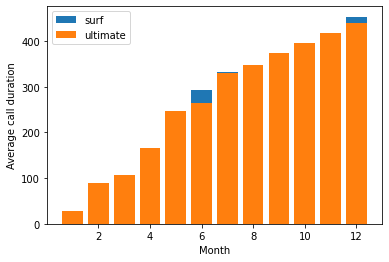

In [231]:
# Making a bar chart to visualize it

fig, ax = plt.subplots()
for plan in df_planmonth_bycall['plan'].unique():
    ax.bar(df_planmonth_bycall.loc[df_planmonth_bycall['plan'] == plan, 'month'],
           df_planmonth_bycall.loc[df_planmonth_bycall['plan'] == plan, 'duration'],
           label=plan)

ax.set_xlabel('Month')
ax.set_ylabel('Average call duration')
ax.legend()
plt.show()

Apparently the months of June, July and December were the only ones in which the average call duration was higher for *surf* plan customers than for *ultimate* plan customers.

Both plans follow a gradual increase from the beginning to the end of the year. We can have two reasons:
- or customers felt more comfortable with calls throughout the year
- or the new customers that came in spoke more than the previous ones, changing the average

In [232]:
# Comparing the number of minutes that 'surf' users require each month.

df_surf = df[df['plan']== 'surf']
df_surf_callmean = df_surf.groupby('month')['duration'].mean()
df_surf_callmean

month
1       5.933538
2      36.632754
3      89.403875
4     162.931373
5     243.975630
6     292.587111
7     331.402000
8     333.624894
9     357.794623
10    387.697944
11    398.192782
12    453.175605
Name: duration, dtype: float64

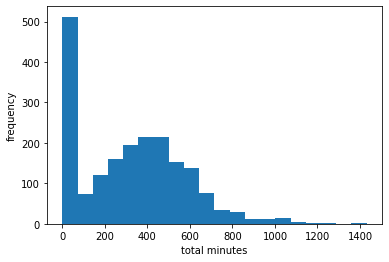

In [233]:
# Creating a histogram for the monthly minutes in the 'surf' plan

plt.hist(df_surf['duration'], bins=20)
plt.xlabel('total minutes')
plt.ylabel('frequency')
plt.show()

The histogram generated for the number of minutes that 'surf' users require each month shows a positive skewed distribution, with a concentration of smaller values (in relation to the total) at the beginning of the x-axis and a longer tail on the right. This indicates that the majority of users spend fewer minutes on the 'surf' plan per month, with a small percentage of users spending a large number of minutes.

In [234]:
# Comparing the number of minutes 'ultimate' users require each month.

df_ultimate = df[df['plan']== 'ultimate']
df_ultimate_callmean = df_ultimate.groupby('month')['duration'].mean()
df_ultimate_callmean

month
1      27.135185
2      88.634333
3     107.138125
4     166.166750
5     247.250667
6     265.179355
7     330.864861
8     348.228519
9     374.133789
10    395.331667
11    417.192578
12    438.824832
Name: duration, dtype: float64

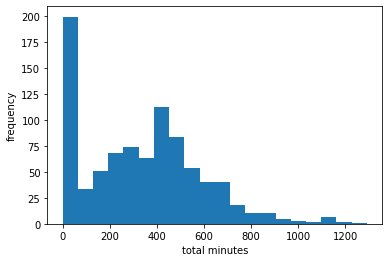

In [235]:
# Creating a histogram for the monthly minutes in the 'ultimate' plan

plt.hist(df_ultimate['duration'], bins=20)
plt.xlabel('total minutes')
plt.ylabel('frequency')
plt.show()

The histogram generated for the number of minutes 'ultimate' users require each month shows a positive skewed distribution similar to the 'surf' plane, with a concentration of smaller values at the beginning of the x-axis and a longer tail to the right. However, from the statistical summary, it can be seen that, on average, users of the 'ultimate' plan spend more minutes per month than users of the 'surf' plan. Furthermore, from the data presented, it appears that the average number of minutes increases faster over the months for the 'ultimate' plan compared to the 'surf' plan.

Let's now calculate the **mean**, the **variance** and the **standard deviation** of the call duration to reason if users of different plans have different behavior in their calls.

**Average duration of calls**

In [236]:
df_surf_call_mean = df_surf['duration'].mean()

In [237]:
df_ultimate_call_mean = df_ultimate['duration'].mean()

In [238]:
# Calculating average monthly call duration.

print('The monthly average call duration in the Surf plan is ' + str(df_surf_call_mean) + ' and in the Ultimate plan is ' + str(df_ultimate_call_mean))

The monthly average call duration in the Surf plan is 323.02954845256215 and in the Ultimate plan is 334.23888


**Call duration variation**

In [239]:
df_surf_call_variance = np.var(df_surf['duration'])

In [240]:
df_ultimate_call_variance = np.var(df_ultimate['duration'])

In [241]:
# Calculating the variance of monthly call duration.

print('The monthly variance of call duration in the Surf plan is ' + str(df_surf_call_variance) + ' and in the Ultimate plan is ' + str(df_ultimate_call_variance))

The monthly variance of call duration in the Surf plan is 65590.5476084719 and in the Ultimate plan is 66484.01626274559


**Standard deviation of call duration**

In [242]:
df_surf_call_std = np.sqrt(df_surf_call_variance)

In [243]:
df_ultimate_call_std = np.sqrt(df_ultimate_call_variance)

In [244]:
# Calculating the standard deviation of monthly call duration.

print('The monthly standard deviation of call duration in the Surf plan is ' + str(df_surf_call_std) + ' and in the Ultimate plan is ' + str(df_ultimate_call_std))

The monthly standard deviation of call duration in the Surf plan is 256.10651613825036 and in the Ultimate plan is 257.84494616483295


**Call Duration Box Diagram**

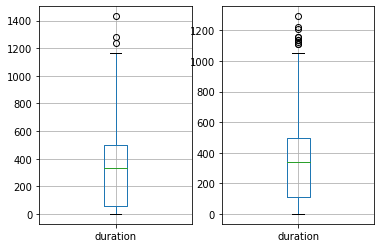

In [245]:
# Making a boxplot to visualize the monthly call duration distribution.

fig, axes = plt.subplots(nrows=1, ncols=2)

df_surf.boxplot(column='duration', ax=axes[0])
df_ultimate.boxplot(column='duration', ax=axes[1])

plt.show()

In [246]:
# Checking the maximum value of most call duration data in the Surf plan

df_surf['duration'].quantile(0.75)

497.6599999999999

In [247]:
# Checking the maximum value of most call duration data in the Surf plan

df_surf['duration'].quantile(0.75)

497.6599999999999

In [248]:
# How many rows represent connections in the Surf plan that exceeded the monthly limit of 1000 minutes

len(df_surf.query('duration > 1000'))

23

In [249]:
# How many rows represent calls in the Ultimate plan that exceeded 1000 minutes

len(df_ultimate.query('duration > 1000'))

14

In [250]:
# How many rows represent calls in the Ultimate plan that exceeded the monthly limit of 3000 minutes

len(df_ultimate.query('duration > 3000'))

0

We can see that for most customers (75% - more than half) of both plans the **average duration of calls** is very similar.

In the Surf plan we still have some considerable values (23) above 1000 minutes while for Ultimate they tend to stabilize around 1000 (only 14 above), both having outliers.

However, this is a considerably positive point for Ultimate plan customers, who are entitled to 3000 minutes, but none of them exceeded this limit, not generating extra revenue.

### Messages

In [251]:
# Comparing the average number of messages for each plan for each different month.

df_planmonth_bymsg = df.groupby(['plan', 'month'])['msg_id'].mean().reset_index()

df_planmonth_bymsg

,plan,month,msg_id
0,surf,1,0.323077
1,surf,2,1.565217
2,surf,3,4.387500
3,surf,4,8.529412
4,surf,5,15.386555
5,surf,6,17.977778
6,surf,7,20.922581
7,surf,8,24.404255
8,surf,9,27.367925
9,surf,10,31.120968


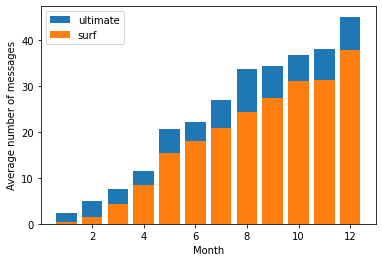

In [252]:
# Making a bar chart to visualize it.
fig, ax = plt.subplots()
for plan in df_planmonth_bymsg['plan'].unique()[::-1]:
     ax.bar(df_planmonth_bymsg.loc[df_planmonth_bymsg['plan'] == plan, 'month'],
            df_planmonth_bymsg.loc[df_planmonth_bymsg['plan'] == plan, 'msg_id'],
            label=plan)

ax.set_xlabel('Month')
ax.set_ylabel('Average number of messages')
ax.legend()
plt.show()

With this bar graph, it is clear that customers of the *ultimate* plan sent, on average, more messages than those of the *surf* plan, with emphasis on a greater difference in the month of August and a continuous increase between October and November, even when *surf* customers appeared to have maintained the same average.

Both plans follow a gradual increase from the beginning to the end of the year. We can have two reasons:
- or customers felt more comfortable with messages throughout the year
- or the new customers that entered sent more messages than the previous ones, changing the average

In [253]:
# Comparing the number of messages that 'surf' users require each month.

df_surf = df[df['plan']== 'surf']
df_surf_msgmean = df_surf.groupby('month')['msg_id'].mean()
df_surf_msgmean

month
1      0.323077
2      1.565217
3      4.387500
4      8.529412
5     15.386555
6     17.977778
7     20.922581
8     24.404255
9     27.367925
10    31.120968
11    31.323944
12    37.847134
Name: msg_id, dtype: float64

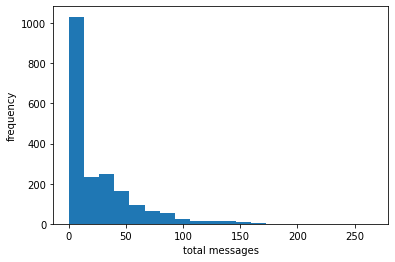

In [254]:
# Creating a histogram for monthly messages in the 'surf' plan

plt.hist(df_surf['msg_id'], bins=20)
plt.xlabel('total messages')
plt.ylabel('frequency')
plt.show()

In [255]:
# Comparing the number of messages 'ultimate' users require each month.

df_ultimate = df[df['plan']== 'ultimate']
df_ultimate_msgmean = df_ultimate.groupby('month')['msg_id'].mean()
df_ultimate_msgmean

month
1      2.296296
2      5.033333
3      7.593750
4     11.575000
5     20.688889
6     22.241935
7     26.902778
8     33.728395
9     34.305263
10    36.675439
11    37.976562
12    45.087248
Name: msg_id, dtype: float64

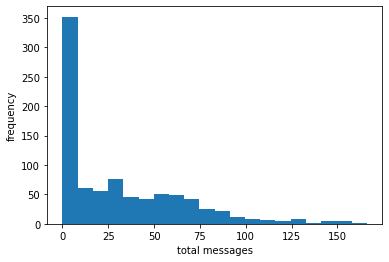

In [256]:
# Creating a histogram for the monthly minutes in the 'ultimate' plan

plt.hist(df_ultimate['msg_id'], bins=20)
plt.xlabel('total messages')
plt.ylabel('frequency')
plt.show()

Despite the average number of *surf* messages being lower, it seems that we have some outliers that reach over 200 messages, while the *ultimate* that is entitled to more is close to 150 messages.

Let's now calculate the **mean**, the **variance** and the **standard deviation** of the number of messages to reason whether users from different plans have different behaviors in relation to these messages.

**Average number of messages**

In [257]:
df_surf_msgmean = df_surf['msg_id'].mean()

In [258]:
df_ultimate_msgmean = df_ultimate['msg_id'].mean()

In [259]:
# Calculating the average monthly length of messages.

print('The monthly average of messages in the Surf plan is ' + str(df_surf_msgmean) + ' and in the Ultimate plan is ' + str(df_ultimate_msgmean))

The monthly average of messages in the Surf plan is 24.220700152207 and in the Ultimate plan is 30.762285714285714


**Variation in the number of messages**

In [260]:
df_surf_msg_variance = np.var(df_surf['msg_id'])

In [261]:
df_ultimate_msg_variance = np.var(df_ultimate['msg_id'])

In [262]:
# Calculating the variance of the monthly number of messages.

print('The monthly variation of messages in the Surf plan is ' + str(df_surf_msg_variance) + ' and in the Ultimate plan is ' + str(df_ultimate_msg_variance))

The monthly variation of messages in the Surf plan is 1048.4155227974582 and in the Ultimate plan is 1198.281777632653


**Standard deviation of number of messages**

In [263]:
df_surf_msg_std = np.sqrt(df_surf_msg_variance)

In [264]:
df_ultimate_msg_std = np.sqrt(df_ultimate_msg_variance)

In [265]:
# Calculating the standard deviation of the monthly number of messages.

print('The monthly standard deviation of messages in the Surf plan is ' + str(df_surf_msg_std) + ' and in the Ultimate plan is ' + str(df_ultimate_msg_std))

The monthly standard deviation of messages in the Surf plan is 32.379245247495476 and in the Ultimate plan is 34.61620686373152


**Message Number Box Diagram**

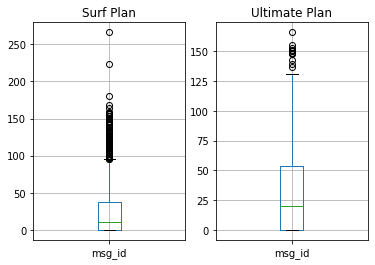

In [266]:
# Making a boxplot to visualize the distribution of the monthly number of messages.

fig, axes = plt.subplots(nrows=1, ncols=2)

df_surf.boxplot(column='msg_id', ax=axes[0])
axes[0].set_title('Surf Plan')

df_ultimate.boxplot(column='msg_id', ax=axes[1])
axes[1].set_title('Ultimate Plan')

plt.show()

In [267]:
# Checking the maximum value of most message data in the Surf plan

df_surf['msg_id'].quantile(0.75)

38.0

In [268]:
# Checking the maximum value of most messaging data in the Ultimate plan

df_ultimate['msg_id'].quantile(0.75)

53.5

In [269]:
# How many rows represent customers on the Surf plan who have exceeded the monthly limit of 1000 messages

len(df_surf.query('msg_id > 50'))

327

In [270]:
# How many rows represent customers on the Ultimate plan who have exceeded 1000 messages

len(df_ultimate.query('msg_id > 50'))

238

In [271]:
# How many rows represent customers on the Ultimate plan who have exceeded the monthly limit of 3000 minutes

len(df_ultimate.query('msg_id > 1000'))

0

We can observe that the majority of clients (75% - more than half) of the Surf Plan were able to limit themselves to the 50 messages included in the package, while for the Ultimate Plan it provided much more than necessary (they did not reach 55 while could have gone up to 1000). At least for the company, releasing 1000 messages, knowing that their customers don't even use 10% of them, seems like a good job of marketing.

In the Surf plan we still have some considerable values (327) above the 50 messages in the package, while for Ultimate we only have 238 customers who, depending on the messages, would really need to be on this plan to avoid paying extra fees.

Another considerably positive point for Ultimate plan customers, who, having the right to 1000 minutes, did not exceed this limit, not generating extra revenue.

### Internet

In [272]:
# Comparing the average number of gigabytes used for each plan for each different month.

df_planmonth_bygb = df.groupby(['plan', 'month'])['gb_used'].mean().reset_index()

df_planmonth_bygb

,plan,month,gb_used
0,surf,1,0.153846
1,surf,2,1.652174
2,surf,3,3.962500
3,surf,4,6.088235
4,surf,5,9.294118
5,surf,6,11.214815
6,surf,7,13.393548
7,surf,8,14.654255
8,surf,9,15.245283
9,surf,10,16.552419


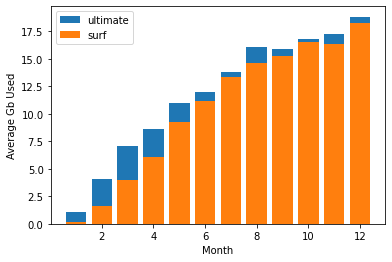

In [273]:
# Making a bar chart to visualize it.
fig, ax = plt.subplots()
for plan in df_planmonth_bygb['plan'].unique()[::-1]:
     ax.bar(df_planmonth_bygb.loc[df_planmonth_bygb['plan'] == plan, 'month'],
            df_planmonth_bygb.loc[df_planmonth_bygb['plan'] == plan, 'gb_used'],
            label=plan)

ax.set_xlabel('Month')
ax.set_ylabel('Average Gb Used')
ax.legend()
plt.show()

With this bar chart it is evident that *ultimate* plan customers used, on average, more internet than *surf* plan customers, with a greater difference in March, a continuous increase between October and November, with emphasis on while *surf* customers appeared to have slightly decreased their usage, so did *ultimate* customers from August to September.

In [274]:
# Comparing the number of gigabytes that 'surf' users require each month.

df_surf = df[df['plan']== 'surf']
df_surf_gbmean = df_surf.groupby('month')['gb_used'].mean()
df_surf_gbmean

month
1      0.153846
2      1.652174
3      3.962500
4      6.088235
5      9.294118
6     11.214815
7     13.393548
8     14.654255
9     15.245283
10    16.552419
11    16.373239
12    18.283439
Name: gb_used, dtype: float64

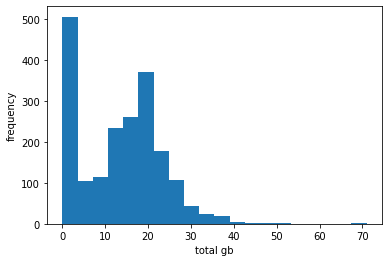

In [275]:
# Creating a histogram for the monthly gigabytes in the 'surf' plan

plt.hist(df_surf['gb_used'], bins=20)
plt.xlabel('total gb')
plt.ylabel('frequency')
plt.show()

In [276]:
# Comparing the number of gigabytes 'ultimate' users require each month.

df_ultimate = df[df['plan']== 'ultimate']
df_ultimate_gbmean = df_ultimate.groupby('month')['gb_used'].mean()
df_ultimate_gbmean

month
1      1.074074
2      4.100000
3      7.062500
4      8.650000
5     11.000000
6     12.000000
7     13.777778
8     16.111111
9     15.873684
10    16.815789
11    17.234375
12    18.838926
Name: gb_used, dtype: float64

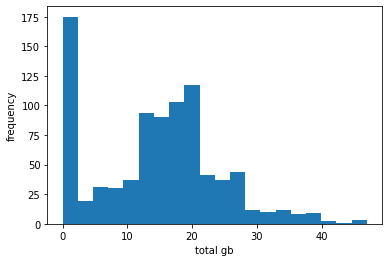

In [277]:
# Creating a histogram for the monthly gigabytes in the 'ultimate' plan

plt.hist(df_ultimate['gb_used'], bins=20)
plt.xlabel('total gb')
plt.ylabel('frequency')
plt.show()

Despite the average number of *surf* messages being smaller, it seems that we have some outliers that reach over 50 messages, while the *ultimate* that is entitled to more is close to 40 gigabytes.

Let's now calculate the **mean**, **variance** and **standard deviation** of the number of gigabytes to reason whether users of different plans have different behaviors in relation to this internet use.

**Average number of gigabytes**

In [278]:
df_surf_gbmean = df_surf['gb_used'].mean()

In [279]:
df_ultimate_gbmean = df_ultimate['gb_used'].mean()

In [280]:
# Calculating the average monthly length of messages.

print('Average monthly gigabytes on the Surf plan is ' + str(df_surf_gbmean) + ' and on the Ultimate plan is ' + str(df_ultimate_gbmean))

Average monthly gigabytes on the Surf plan is 13.313546423135465 and on the Ultimate plan is 14.512


**Variation of the number of gigabytes**

In [281]:
df_surf_gb_variance = np.var(df_surf['gb_used'])

In [282]:
df_ultimate_gb_variance = np.var(df_ultimate['gb_used'])

In [283]:
# Calculating the variance of the monthly number of gigabytes.

print('Monthly gigabyte variance on the Surf plan is ' + str(df_surf_gb_variance) + ' and on the Ultimate plan is ' + str(df_ultimate_gb_variance))

Monthly gigabyte variance on the Surf plan is 97.14775662633298 and on the Ultimate plan is 96.47614171428573


**Standard deviation of number of gigabytes**

In [284]:
df_surf_gb_std = np.sqrt(df_surf_gb_variance)

In [285]:
df_ultimate_gb_std = np.sqrt(df_ultimate_gb_variance)

In [286]:
# Calculating the standard deviation of the monthly number of gigabytes.

print('The monthly standard deviation of gigabytes on the Surf plan is ' + str(df_surf_msg_std) + ' and on the Ultimate plan is ' + str(df_ultimate_msg_std))

The monthly standard deviation of gigabytes on the Surf plan is 32.379245247495476 and on the Ultimate plan is 34.61620686373152


**Number of gigabytes box plot**

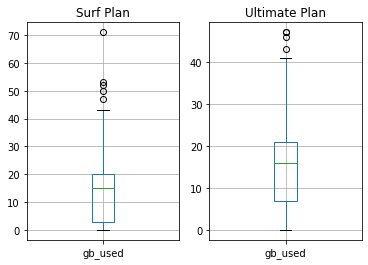

In [287]:
# Making a boxplot to visualize the distribution of the monthly number of messages.

fig, axes = plt.subplots(nrows=1, ncols=2)

df_surf.boxplot(column='gb_used', ax=axes[0])
axes[0].set_title('Surf Plan')

df_ultimate.boxplot(column='gb_used', ax=axes[1])
axes[1].set_title('Ultimate Plan')

plt.show()

In [288]:
# Checking the maximum value of most message data in the Surf plan

df_surf['gb_used'].quantile(0.75)

20.0

In [289]:
# Checking the maximum value of most messaging data in the Ultimate plan

df_ultimate['gb_used'].quantile(0.75)

21.0

In [290]:
# How many rows represent customers on the Surf plan who have exceeded the monthly limit of 1000 messages

len(df_surf.query('gb_used > 15'))

934

In [291]:
# How many rows represent customers on the Ultimate plan who have exceeded 1000 messages

len(df_ultimate.query('gb_used > 15'))

443

In [292]:
# How many rows represent customers on the Ultimate plan who have exceeded the monthly limit of 3000 minutes

len(df_ultimate.query('gb_used > 30'))

45

Undoubtedly, Ultimate Plan customers are more controlled. Most of their data is under 21gb, well under the package's 30gb limit.

We can see that more than half of Surf Plan customers exceeded their limit of 15gb included in the package, while for the Ultimate Plan it provided much more than necessary. At least for the company, disclosing 30gb, knowing that only less than 25% of its customers use that amount, seems like a good job of marketing.

The internet package was the only one in which Ultimate plan customers exceeded their limit and generated extra revenue.

# Revenue

In [293]:
# Reviewing the organization of our Dataframe

df

,user_id,month,call_id,duration,msg_id,mb_used,gb_used,city,plan,active,extra_min,extra_msgs,extra_gb,revenue
0,1000,12,16,116.83,11.0,1901.47,2,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1,0.0,0.0,0,70.00
1,1001,8,22,171.14,30.0,6919.15,7,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,0.0,0.0,0,20.00
2,1001,9,38,297.69,44.0,13314.82,14,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,0.0,0.0,0,20.00
3,1001,10,47,374.11,53.0,22330.49,23,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,0.0,3.0,7,90.09
4,1001,11,49,404.59,36.0,18504.30,19,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,0.0,0.0,4,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,1499,8,0,0.00,0.0,0.00,0,"Orlando-Kissimmee-Sanford, FL MSA",surf,1,0.0,0.0,0,20.00
2842,1499,9,35,330.37,0.0,12984.76,13,"Orlando-Kissimmee-Sanford, FL MSA",surf,1,0.0,0.0,0,20.00
2843,1499,10,41,363.28,0.0,19492.43,20,"Orlando-Kissimmee-Sanford, FL MSA",surf,1,0.0,0.0,5,70.00
2844,1499,11,39,288.56,0.0,16813.83,17,"Orlando-Kissimmee-Sanford, FL MSA",surf,1,0.0,0.0,2,40.00


In [294]:
# Comparing the average revenue of each plan for each different month.

df_planmonth_byrevenue = df.groupby(['plan', 'month'])['revenue'].mean().reset_index()

df_planmonth_byrevenue

,plan,month,revenue
0,surf,1,20.000000
1,surf,2,22.004501
2,surf,3,27.539700
3,surf,4,30.320931
4,surf,5,38.042915
5,surf,6,41.009491
6,surf,7,53.541000
7,surf,8,58.131676
8,surf,9,53.777438
9,surf,10,62.072098


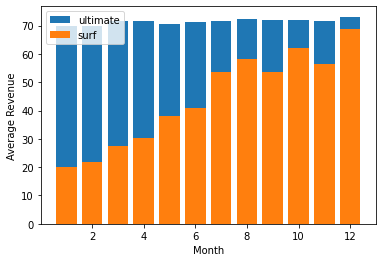

In [295]:
# Making a bar chart to visualize it.
fig, ax = plt.subplots()
for plan in df_planmonth_byrevenue['plan'].unique()[::-1]:
     ax.bar(df_planmonth_byrevenue.loc[df_planmonth_byrevenue['plan'] == plan, 'month'],
            df_planmonth_byrevenue.loc[df_planmonth_byrevenue['plan'] == plan, 'revenue'],
            label=plan)

ax.set_xlabel('Month')
ax.set_ylabel('Average Revenue')
ax.legend()
plt.show()

With this bar graph, it is evident that *ultimate* plan customers had, on average, a more homogeneous annual cost than those of the *surf* plan, with a greater difference in the months of January and February. As the year went on, *surf* customers appeared to have increased their spending.

In [296]:
# Comparing the income that 'surf' users have each month.

df_surf = df[df['plan']== 'surf']
df_surf_revenuemean = df_surf.groupby('month')['revenue'].mean()
df_surf_revenuemean

month
1     20.000000
2     22.004501
3     27.539700
4     30.320931
5     38.042915
6     41.009491
7     53.541000
8     58.131676
9     53.777438
10    62.072098
11    56.575754
12    68.886066
Name: revenue, dtype: float64

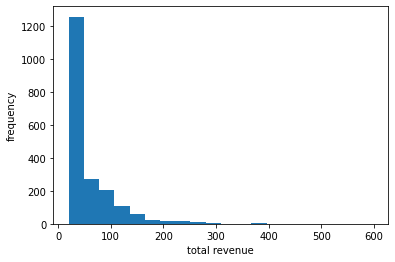

In [297]:
# Creating a histogram for monthly revenue in the 'surf' plan

plt.hist(df_surf['revenue'], bins=20)
plt.xlabel('total revenue')
plt.ylabel('frequency')
plt.show()

In [298]:
# Comparing the revenue 'ultimate' users have each month.

df_ultimate = df[df['plan']== 'ultimate']
df_ultimate_revenuemean = df_ultimate.groupby('month')['revenue'].mean()
df_ultimate_revenuemean

month
1     70.000000
2     70.000000
3     71.750000
4     71.750000
5     70.466667
6     71.241935
7     71.652778
8     72.506173
9     71.842105
10    72.149123
11    71.804688
12    73.147651
Name: revenue, dtype: float64

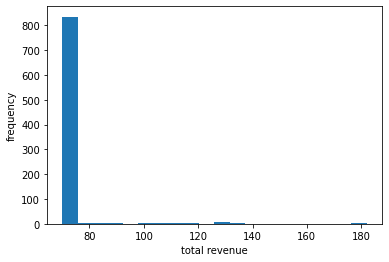

In [299]:
# Creating a histogram for the 'ultimate' plan revenue

plt.hist(df_ultimate['revenue'], bins=20)
plt.xlabel('total revenue')
plt.ylabel('frequency')
plt.show()

Despite the average number of *surf* messages being lower, it seems that we have some outliers that reach over 500 dollars, while *ultimate*, which is already more expensive and offers more product, has few outliers, which are no more than a maximum of 200 dollars.

Let's now calculate the **mean**, the **variance** and the **standard deviation** of the revenue to reason whether users of the different plans have different behaviors in relation to this revenue.

**Average revenue**

In [300]:
df_surf_revenuemean = df_surf['revenue'].mean()

In [301]:
df_ultimate_revenuemean = df_ultimate['revenue'].mean()

In [302]:
# Calculating the average monthly length of messages.

print('The average monthly revenue in the Surf plan is ' + str(df_surf_revenuemean) + ' and in the Ultimate plan is ' + str(df_ultimate_revenuemean))

The average monthly revenue in the Surf plan is 51.698455403348554 and in the Ultimate plan is 71.904


**Variation of the revenue**

In [303]:
df_surf_revenue_variance = np.var(df_surf['revenue'])

In [304]:
df_ultimate_revenue_variance = np.var(df_ultimate['revenue'])

In [305]:
# Calculating the variance in monthly revenue.

print('Monthly revenue variance in Surf plan is ' + str(df_surf_revenue_variance) + ' and in Ultimate plan is ' + str(df_ultimate_revenue_variance))

Monthly revenue variance in Surf plan is 2604.2211737995485 and in Ultimate plan is 111.39878400000002


**Revenue standard deviation**

In [306]:
df_surf_revenue_std = np.sqrt(df_surf_revenue_variance)

In [307]:
df_ultimate_revenue_std = np.sqrt(df_ultimate_revenue_variance)

In [308]:
# Calculating the standard deviation of monthly revenue.

print('The monthly standard deviation in revenue on the Surf plan is ' + str(df_surf_revenue_std) + ' and on the Ultimate plan is ' + str(df_ultimate_revenue_std))

The monthly standard deviation in revenue on the Surf plan is 51.031570363839954 and on the Ultimate plan is 10.554562236303314


That is, there really isn't much variation between the expenses of Ultimate plan customers.

**Revenue Box Diagram**

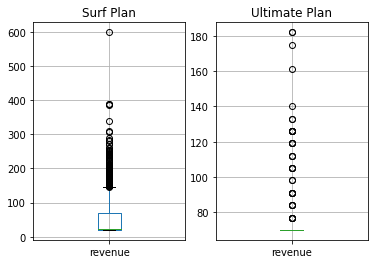

In [309]:
# Making a box plot to visualize the revenue distribution.

fig, axes = plt.subplots(nrows=1, ncols=2)

df_surf.boxplot(column='revenue', ax=axes[0])
axes[0].set_title('Surf Plan')

df_ultimate.boxplot(column='revenue', ax=axes[1])
axes[1].set_title('Ultimate Plan')

plt.show()

In [310]:
# Checking the most expressive maximum value of most revenue data in the Surf plan

df_surf['revenue'].quantile(0.75)

70.0

At least 25% of customers who pay for the *Surf* plan could be paying for the *Ultimate* plan to get more benefits.

In [311]:
# Checking the maximum value of most revenue data in the Ultimate plan

df_ultimate['revenue'].quantile(0.75)

70.0

This is the best evidence that only 25% exceeded the amount already planned. These customers who already accept to pay more at the beginning seem to be more controlled.

In [312]:
# How many rows represent Surf plan customers who have exceeded the $20 monthly limit

len(df_surf.query('revenue > 20'))

1101

In [313]:
# How many rows represent customers on the Ultimate plan who have passed the $70 monthly limit

len(df_ultimate.query('revenue > 70'))

40

Undoubtedly, Ultimate Plan customers are more controlled. As a summary, the fact that they do not exceed the monthly limits of the package, they end up not having to worry about extra expenses.

We can see that more than half of the Surf Plan customers (1101) exceeded their limit of 20 dollars, while for the Ultimate Plan only 40 spent more than they proposed to pay.

Analyzing data is really important to create strategies like these in which most customers consider paying little initially and then end up spending more than those who have already planned a higher cost.

# Testing statistical hypotheses

Testing the hypothesis that the average revenue of Ultimate and Surf calling plan users is different.

In [314]:
# Testing the hypotheses

# Null hypothesis = plan revenue is equal
# H1 = plans revenue is different

surf_revenue = df_surf['revenue']
ultimate_revenue = df_ultimate['revenue']

alpha=0.05

results= st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
     print("We reject the null hypothesis")
else:
     print("We cannot reject the null hypothesis")

p-value: 9.393451574104805e-60
We reject the null hypothesis


Testing the hypothesis that the average income of users in the NY-NJ area differs from users in other regions.

In [315]:
# Filtering a Dataframe which only considers customers from the NY-NJ region

ny_revenue = df.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
ny_revenue

,user_id,month,call_id,duration,msg_id,mb_used,gb_used,city,plan,active,extra_min,extra_msgs,extra_gb,revenue
73,1014,11,23,149.33,9.0,1175.59,2,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,1,0.00,0.0,0,20.0000
74,1014,12,125,1050.62,64.0,7792.41,8,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,1,550.62,14.0,0,36.9386
103,1022,1,0,0.00,0.0,0.00,0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,0,0.00,0.0,0,20.0000
104,1022,2,0,0.00,0.0,0.00,0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,0,0.00,0.0,0,20.0000
105,1022,3,0,0.00,0.0,0.00,0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,0,0.00,0.0,0,20.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,1498,8,37,244.57,0.0,20261.89,21,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,1,0.00,0.0,5,70.0000
2830,1498,9,39,344.62,0.0,22827.28,23,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,1,0.00,0.0,8,100.0000
2831,1498,10,37,278.06,0.0,20580.76,21,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,1,0.00,0.0,6,80.0000
2832,1498,11,29,208.99,0.0,19168.55,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,1,0.00,0.0,4,60.0000


We have 451 rows of customer data from the New York area.

In [316]:
# Filtering a Dataframe in which to consider customers from regions other than NY-NJ

otherregions_revenue = df.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')
otherregions_revenue

,user_id,month,call_id,duration,msg_id,mb_used,gb_used,city,plan,active,extra_min,extra_msgs,extra_gb,revenue
0,1000,12,16,116.83,11.0,1901.47,2,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1,0.0,0.0,0,70.00
1,1001,8,22,171.14,30.0,6919.15,7,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,0.0,0.0,0,20.00
2,1001,9,38,297.69,44.0,13314.82,14,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,0.0,0.0,0,20.00
3,1001,10,47,374.11,53.0,22330.49,23,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,0.0,3.0,7,90.09
4,1001,11,49,404.59,36.0,18504.30,19,"Seattle-Tacoma-Bellevue, WA MSA",surf,1,0.0,0.0,4,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,1499,8,0,0.00,0.0,0.00,0,"Orlando-Kissimmee-Sanford, FL MSA",surf,1,0.0,0.0,0,20.00
2842,1499,9,35,330.37,0.0,12984.76,13,"Orlando-Kissimmee-Sanford, FL MSA",surf,1,0.0,0.0,0,20.00
2843,1499,10,41,363.28,0.0,19492.43,20,"Orlando-Kissimmee-Sanford, FL MSA",surf,1,0.0,0.0,5,70.00
2844,1499,11,39,288.56,0.0,16813.83,17,"Orlando-Kissimmee-Sanford, FL MSA",surf,1,0.0,0.0,2,40.00


We have 2395 rows of customer data from other regions.

In [317]:
# The percentage that New York customer data represents compared to customers in other regions

ny_percentage = (len(ny_revenue) / len(otherregions_revenue)) * 100

print('New York data represents ' + str(ny_percentage) + '% of all collected regions.')

New York data represents 18.83089770354906% of all collected regions.


In [318]:
# Testing the hypotheses

# Null hypothesis = revenue of regions is equal
# H1 = revenue of regions is different

ny = ny_revenue['revenue']
otherregions = otherregions_revenue['revenue']

alpha=0.05

results= st.ttest_ind(ny, otherregions, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
     print("We reject the null hypothesis")
else:
     print("We cannot reject the null hypothesis")

p-value: 0.01254771533552921
We reject the null hypothesis


Apparently telephony costs among New York users are very different from customers in other regions. Could it be that because they are a metropolis they end up using the phone more frequently?

This leads us to consider the great importance of carrying out analyzes also based on geographic differences.

# General Conclusion

At the beginning of our data studies, by enriching the table with more columns, we could observe that, if a customer chooses to observe how much service he has available **for every dollar** he invests, we could see that:
- as for what is **included** in the package, the **surf** plan is more advantageous for those who want **more internet** for every dollar invested while the **ultimate** plan offers more messages and minutes binding for every dollar.


- if you reach the included limits, regarding **extra** payments, the most expensive package (ultimate) is the most advantageous because it offers more messages, more megabytes and more call minutes for each dollar.

That is, in terms of the amount of service provided for every dollar invested, it is only worth paying for the cheapest plan for customers who prefer more mobile data (than calling and texting) **but** know that **no use more than 15gb** (15360mb).

Of the **500** users analyzed in this study, according to `df_users`, only **481 made calls**.

Perhaps the other 19 prefer only to communicate via the internet or by message.

Of the **500** users analyzed in this study, according to `df_users`, only **402 sent messages**.

Perhaps the other 98 prefer only to communicate over the internet or over the phone.

We had more customers making calls than sending SMS.

Within this sample of **500** users analyzed, according to `df_users`, **489 sent messages**.

Only 11 still use the services for calling or SMS.

Within our "small group" of customers, the sequence of the most used services is: **internet** (489) > **connection** (481) > **messages** (402).

Apparently the months of June, July and December were the only ones in which the average call duration was higher for *surf* plan customers than for *ultimate* plan customers.

Both plans follow a gradual increase from the beginning to the end of the year. We can have two reasons:
- or customers felt more comfortable with calls throughout the year
- or the new customers that came in spoke more than the previous ones, changing the average

The average monthly call duration on the Surf plan is 323.02954845256215 and on the Ultimate plan it is 334.23888

The monthly call duration variation in the Surf plan is 65590.5476084719 and in the Ultimate plan it is 66484.01626274559

The monthly standard deviation of call duration on the Surf plan is 256.10651613825036 and on the Ultimate plan it is 257.84494616483295

We could see that for most customers (75% - more than half) of both plans the **average duration of calls** is very similar.

In the Surf plan we still have some considerable values (23) above 1000 minutes while for Ultimate they tend to stabilize around 1000 (only 14 above), both having outliers.

However, this is a considerably positive point for Ultimate plan customers, who are entitled to 3000 minutes, but none of them exceeded this limit, not generating extra revenue.

Customers of the *ultimate* plan sent, on average, more messages than those of the *surf* plan, with a greater difference in the month of August and a continuous increase between October and November, even when *surf* customers appeared to have maintained the same average.

Both plans follow a gradual increase from the beginning to the end of the year. We can have two reasons:
- or customers felt more comfortable with messages throughout the year
- or the new customers that entered sent more messages than the previous ones, changing the average

Despite the average number of *surf* messages being lower, it seems that we have some outliers that reach over 200 messages, while the *ultimate* that is entitled to more is close to 150 messages.

The monthly average of messages in the Surf plan is 24.220700152207 and in the Ultimate plan it is 30.762285714285714

The monthly variation of messages in the Surf plan is 1048.4155227974582 and in the Ultimate plan it is 1198.281777632653

The monthly standard deviation of messages in the Surf plan is 32.379245247495476 and in the Ultimate plan it is 34.61620686373152

The majority of customers (75% - more than half) of the Surf Plan were able to limit themselves to the 50 messages included in the package, while for the Ultimate Plan it provided much more than necessary (they did not reach 55 whereas they could have gone up to 1000). At least for the company, releasing 1000 messages, knowing that their customers don't even use 10% of them, seems like a good job of marketing.

In the Surf plan we still have some considerable values (327) above the 50 messages in the package, while for Ultimate we only have 238 customers who, depending on the messages, would really need to be on this plan to avoid paying extra fees.

Another considerably positive point for Ultimate plan customers, who, having the right to 1000 minutes, did not exceed this limit, not generating extra revenue.

It was evident that customers of the *ultimate* plan used, on average, more internet than those of the *surf* plan, with a greater difference in the month of March, a continuous increase between October and November, while customers of the * surf* appeared to have dropped slightly in usage, as did *ultimate* from August to September.

Despite the average number of *surf* messages being smaller, it seems that we have some outliers that reach over 50 messages, while the *ultimate* that is entitled to more is close to 40 gigabytes.

The monthly average of gigabytes in the Surf plan is 13,313546423135465 and in the Ultimate plan it is 14,512

The monthly variation of gigabytes in the Surf plan is 97.14775662633298 and in the Ultimate plan it is 96.47614171428573

The monthly standard deviation of gigabytes in the Surf plan is 32.379245247495476 and in the Ultimate plan it is 34.61620686373152

Undoubtedly, Ultimate Plan customers are more controlled. Most of their data is under 21gb, well under the package's 30gb limit.

We can see that more than half of Surf Plan customers exceeded their limit of 15gb included in the package, while for the Ultimate Plan it provided much more than necessary. At least for the company, disclosing 30gb, knowing that only less than 25% of its customers use that amount, seems like a good job of marketing.

The internet package was the only one in which Ultimate plan customers exceeded their limit and generated extra revenue.

It was evident that customers of the *ultimate* plan had, on average, a more homogeneous annual cost than those of the *surf* plan, with a greater difference in the months of January and February. As the year went on, *surf* customers appeared to have increased their spending.

Despite the average number of *surf* messages being lower, it seems that we have some outliers that reach over 500 dollars, while *ultimate*, which is already more expensive and offers more product, has few outliers, which are no more than a maximum of 200 dollars.

The average monthly revenue in the Surf plan is 51,698455403348554 and in the Ultimate plan is 71,904

Monthly revenue variance in Surf plan is 2604.2211737995485 and in Ultimate plan is 111.39878400000002

The monthly standard deviation in revenue on the Surf plan is 51.031570363839954 and on the Ultimate plan it is 10.554562236303314
That is, there really isn't much variation between the expenses of Ultimate plan customers.

At least 25% of customers who pay for the Surf plan could be paying for Ultimate to get more benefits. These customers who already accept to pay more at the beginning seem to be more controlled.

Ultimate Plan customers are more controlled by the fact that they do not exceed the monthly limits of the package, they end up not having to worry about extra revenue.

We can see that more than half of the Surf Plan customers (1101) exceeded their limit of 20 dollars, while for the Ultimate Plan only 40 spent more than they proposed to pay.

Analyzing data is really important to create strategies like these in which most customers consider paying little initially and then end up spending more than those who have already planned a higher cost.

We tested and confirmed the hypothesis that the average revenue of Ultimate and Surf calling plan users is different.

We tested and confirmed the hypothesis that the average income of users in the NY-NJ area differs from users in other regions.

Data from New York represents 18.83089770354906% of all regions collected.

Apparently telephony costs among New York users are very different from customers in other regions. Could it be that because they are a metropolis they end up using the phone more frequently?

This leads us to consider the great importance of carrying out analyzes based on geographic differences.

In short, we conclude that the Surf Plan, the cheapest, is more advantageous for the company that covers a large number of customers with its good internet offer for every dollar, however the customers of this plan mostly exceed the package limits, which increases revenue for the company.

As for the Ultimate Plan, the most expensive, in addition to already providing limits that most customers do not reach, it ends up not interfering with the customer's monthly costs, since it maintains costs without extras, in addition to the company itself offering limits that almost no customer reaches, and is also favored by the fact that they pay and do not use it.

In a search for advantages, we may have a tendency, then, to consider the most expensive package as the most advantageous. But after observing the difference that the location of the client can influence in the needs of greater or lesser use, it is worth putting this variable into play when making this decision.